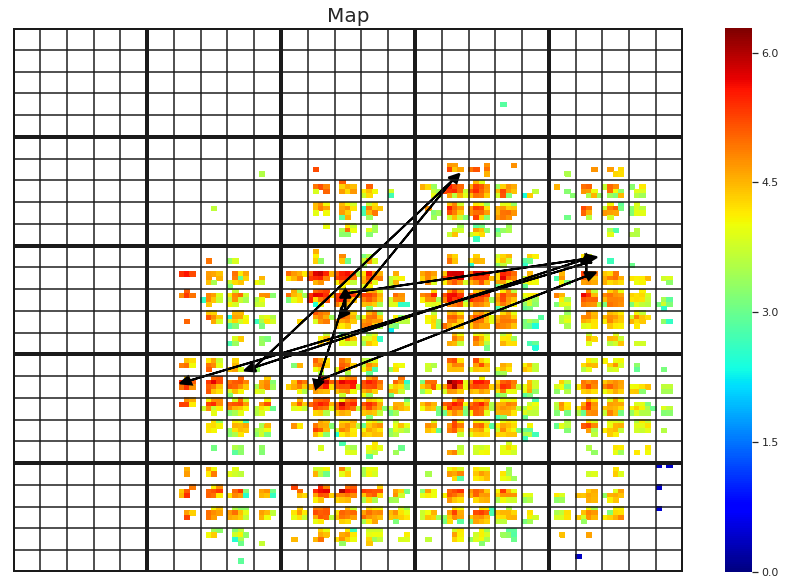

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from math import sqrt

# configure this
num_dims = 6 # dimensions of descriptor
bin_per_dim = 5 # bins in each descriptor
filename = "archive_800.dat" # text archive you want to present
coordsfilename = "samples.dat"
read_coords = True

bin_size = 1 / bin_per_dim
data = np.empty(bin_per_dim ** num_dims)
bdata = np.zeros(bin_per_dim ** num_dims)
data[:] = np.nan

def get_coord(desc, shape):
    coordinate = 0
    for i in range(len(desc)):
        if i == 0:
            coordinate += desc[len(desc)-1] / pointsize
        else:
            coordinate += (bins**i) *  (desc[len(desc)-1-i] / pointsize)
    return np.unravel_index(int(coordinate), shape)

r,a,b,c,d,e,f,z,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_ = np.loadtxt(filename, unpack=True)

minscore, maxscore = 0, 0

j = 0
for i in r:
    data[int(i)] = z[j]
    bdata[int(i)] = z[j]
    if z[j] > maxscore:
        maxscore = z[j]
    if z[j] < minscore:
        minscore = z[j]
    j += 1

dimxy = int(sqrt(bin_per_dim ** num_dims))

heat = np.reshape(data, (dimxy, dimxy))

fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(15,10)})


thick_lines_pos = list(range(0,int(dimxy + dimxy/5),int(dimxy/5)))
lines_pos = list(range(int(dimxy/(5*5)),int(dimxy),int(dimxy/(5*5))))
thin_lines_pos = list(range(int(dimxy/(5*5*5)),int(dimxy),int(dimxy/(5*5*5))))

ax.hlines(thick_lines_pos, 0, dimxy, lw=4)
ax.vlines(thick_lines_pos, 0, dimxy, lw=4)

ax.hlines(lines_pos, 0, dimxy, lw=1.5)
ax.vlines(lines_pos, 0, dimxy, lw=1.5)

# ax.hlines(thin_lines_pos, 0, dimxy, lw=0.2)
# ax.vlines(thin_lines_pos, 0, dimxy, lw=0.2)

ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)
ax.set_facecolor('white')

with sns.axes_style("white"): # makes nan values white
    hmap = sns.heatmap(heat, mask=np.isnan(heat), vmin=minscore, vmax=maxscore, cmap="jet", xticklabels=False,
               yticklabels=False, linecolor='white')

hmap.set_title("Map", fontsize=20)

if read_coords:
    samples = np.loadtxt(coordsfilename)[:,1:]
    prev_coord = (0,0)
    
    for i in range(len(samples)):
        curr_coord = get_coord(samples[i], heat.shape)

        if i == 0:
            prev_coord = curr_coord
        else:
            ax.arrow(prev_coord[0], prev_coord[1], curr_coord[0] - prev_coord[0],
                     curr_coord[1] - prev_coord[1], color='black',
                     linewidth = 2, head_width = 2, head_length = 2)
            prev_coord = curr_coord
        
# ax.annotate("", xy=(0.5, 0.5), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))
plt.savefig(filename + ".pdf")
plt.show()